In [1]:
from standardInclude import *
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

from datetime import timedelta
from datetime import datetime

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [2]:
df_full = pandas.read_csv("./combined_csv/run3Trends_7.csv", parse_dates=True)
df_full = df_full.sort_values(by=['startTime'], ascending=True)

df = df_full.loc[df_full['quality'] == 'Y']

df.head()

,run,startTime,stopTime,nEvents,quality,ctag,ctagPerFill,nSubRuns,AvgGain_Calo1,AvgGain_Calo2,...,relatice dipole [ppb],norm quad [ppb],skew quad [ppb],norm sext [ppb],skew sext [ppb],feedback current [mA],yoke temp top [C],yoke temp bottom [C],runtime,yoke_temp_gradient
4526,30051,2019-11-23 12:35:12,2019-11-23 13:14:01,52792.0,Y,1792769.0,323.429370,46.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4525,30052,2019-11-23 13:14:18,2019-11-23 14:00:50,62991.0,Y,488893.0,345.507420,12.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4524,30053,2019-11-23 14:01:18,2019-11-23 14:48:03,63402.0,Y,1955554.0,350.897901,47.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4523,30054,2019-11-23 14:49:31,2019-11-23 15:39:19,67474.0,Y,371903.0,344.354630,9.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4522,30055,2019-11-23 15:39:41,2019-11-23 16:19:08,53411.0,Y,1721824.0,344.433687,42.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.describe()

,run,nEvents,ctag,ctagPerFill,nSubRuns,AvgGain_Calo1,AvgGain_Calo2,AvgGain_Calo3,AvgGain_Calo4,AvgGain_Calo5,...,magnet cycle,relatice dipole [ppb],norm quad [ppb],skew quad [ppb],norm sext [ppb],skew sext [ppb],feedback current [mA],yoke temp top [C],yoke temp bottom [C],yoke_temp_gradient
count,1486.000000,1486.000000,8.930000e+02,893.000000,893.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.000,1.00,1.00,1.00
mean,32942.388291,85088.741588,3.808308e+06,453.287418,71.129899,1.024423,1.022198,1.026935,1.016594,1.003091,...,14.0,-51.3,-33.7,-39.4,5.9,5.7,4.503,22.78,17.07,5.71
std,1404.921721,49860.473000,2.799109e+06,87.888825,50.111657,0.025960,0.018687,0.022413,0.019794,0.022051,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,30051.000000,1.000000,1.000000e+00,0.006944,1.000000,0.846798,0.846270,0.845306,0.854834,0.847635,...,14.0,-51.3,-33.7,-39.4,5.9,5.7,4.503,22.78,17.07,5.71
25%,31841.250000,34946.250000,1.122994e+06,421.362319,22.000000,1.003052,1.011714,1.009551,1.000000,0.986085,...,14.0,-51.3,-33.7,-39.4,5.9,5.7,4.503,22.78,17.07,5.71
50%,33172.500000,122712.000000,3.674388e+06,464.702877,72.000000,1.027408,1.027120,1.033576,1.023579,1.010742,...,14.0,-51.3,-33.7,-39.4,5.9,5.7,4.503,22.78,17.07,5.71
75%,34209.750000,125485.500000,6.038193e+06,497.329514,112.000000,1.047817,1.034188,1.044110,1.031099,1.020853,...,14.0,-51.3,-33.7,-39.4,5.9,5.7,4.503,22.78,17.07,5.71
max,34923.000000,155365.000000,1.170952e+07,599.073964,209.000000,1.066431,1.048675,1.073163,1.061119,1.060179,...,14.0,-51.3,-33.7,-39.4,5.9,5.7,4.503,22.78,17.07,5.71


In [4]:
print(df.columns)

Index(['run', 'startTime', 'stopTime', 'nEvents', 'quality', 'ctag',
       'ctagPerFill', 'nSubRuns', 'AvgGain_Calo1', 'AvgGain_Calo2',
       'AvgGain_Calo3', 'AvgGain_Calo4', 'AvgGain_Calo5', 'AvgGain_Calo6',
       'AvgGain_Calo7', 'AvgGain_Calo8', 'AvgGain_Calo9', 'AvgGain_Calo10',
       'AvgGain_Calo11', 'AvgGain_Calo12', 'AvgGain_Calo13', 'AvgGain_Calo14',
       'AvgGain_Calo15', 'AvgGain_Calo16', 'AvgGain_Calo17', 'AvgGain_Calo18',
       'AvgGain_Calo19', 'AvgGain_Calo20', 'AvgGain_Calo21', 'AvgGain_Calo22',
       'AvgGain_Calo23', 'AvgGain_Calo24', 'AvgTemp_AllCalos', 'AvgTemp_Calo1',
       'AvgTemp_Calo2', 'AvgTemp_Calo3', 'AvgTemp_Calo4', 'AvgTemp_Calo5',
       'AvgTemp_Calo6', 'AvgTemp_Calo7', 'AvgTemp_Calo8', 'AvgTemp_Calo9',
       'AvgTemp_Calo10', 'AvgTemp_Calo11', 'AvgTemp_Calo12', 'AvgTemp_Calo13',
       'AvgTemp_Calo14', 'AvgTemp_Calo15', 'AvgTemp_Calo16', 'AvgTemp_Calo17',
       'AvgTemp_Calo18', 'AvgTemp_Calo19', 'AvgTemp_Calo20', 'AvgTemp_Calo21',
       '

In [5]:
dfi = df.sample(1000, random_state=12345)

/home/jlab/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


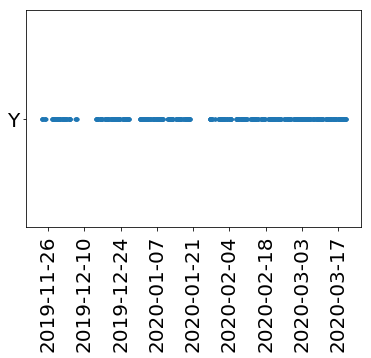

In [6]:
plt.plot(pandas.to_datetime(dfi['startTime']), dfi['quality'],".")
plt.xticks(rotation=90)
plt.show()

---

In [7]:
def plotVariableVsDuration(ax, startTimes, endTimes, value, fmt="b-"):
    for i in range(len(startTimes.values)):
        ax.plot( [startTimes.values[i], endTimes.values[i]], [value.values[i], value.values[i]], fmt)

def makeTrendPlot(axi, runplots, df):
        toPlot, title, ylims, duration, numeric = runplots
        axi.set_title(title)
        if(len(ylims) == 2):
            axi.set_ylim(ylims[0], ylims[1])

        if(numeric):
            yaxis = pandas.to_numeric(df[toPlot], errors='coerce')
            axi2 = axi.twinx()            
        else:
            yaxis = df[toPlot]

        colors = {'N':'red', 'Y':'blue', 'T':'green', 'C':'black'}
        
        if(duration):
            plotVariableVsDuration(axi, pandas.to_datetime(df['startTime']), 
                                   pandas.to_datetime(df['stopTime']), 
                                   yaxis,'b.-')
        elif('Time' in plotX):
            try:
                axi.scatter(pandas.to_datetime(df[plotX]), yaxis,
                          c=df['quality'].apply(lambda x: colors[x]) )
            except:
                axi.plot(pandas.to_datetime(df[plotX]), yaxis, "b.")
                
        else:
            try:
                axi.scatter(pandas.to_numeric(df['plotX']), yaxis,
                          c=df['quality'].apply(lambda x: colors[x]) )
            except:
                axi.plot(pandas.to_numeric(df[plotX]), yaxis, "b.")
            
            
        if(numeric):
            axi.callbacks.connect("ylim_changed", convertAxToPercentageFromMean(axi, axi2, yaxis))
            
def getPercentDiff(x, y):
    return (x-y)/x *100.
            
def convertAxToPercentageFromMean(axi, axi2, yvals):
    y1, y2 = axi.get_ylim()
    mean = yvals.mean()
    stdev = yvals.std()
    #print(y1, y2, mean, y1/mean*1.0, y2/mean*1.0)
    #axi2.set_ylim( getPercentDiff(y1, mean) , getPercentDiff(y2, mean) ) #percent difference from mean
    if(stdev != 0):
        #print(y1, y2, stdev, (y1 - mean) / stdev , ( y2 - mean) / stdev)
        axi2.set_ylim( (y1 - mean) / stdev , ( y2 - mean) / stdev ) #std deviations from mean
    else:
        #print("NaN")
        axi2.set_ylim( -1 , 1 ) #std deviations from mean
    axi2.figure.canvas.draw()   

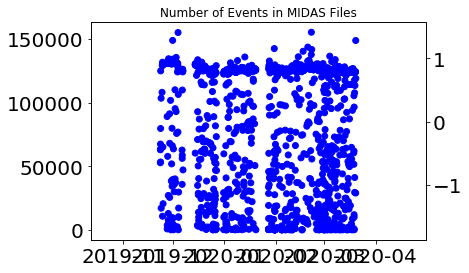

In [8]:
fig, ax = plt.subplots()
plotX='run'
plotX='startTime'
makeTrendPlot(ax, ['nEvents', 'Number of Events in MIDAS Files', [], False, True], df)
plt.show()

---
# How long was the run?

In [9]:
ding = (pandas.to_datetime(df['stopTime']) - pandas.to_datetime(df['startTime'])).loc[ pandas.to_datetime(df['stopTime']) > pandas.to_datetime(df['startTime']) ]
print(ding.head())
print(ding.sum())

4526   00:38:49
4525   00:46:32
4524   00:46:45
4523   00:49:48
4522   00:39:27
dtype: timedelta64[ns]
58 days 09:51:02


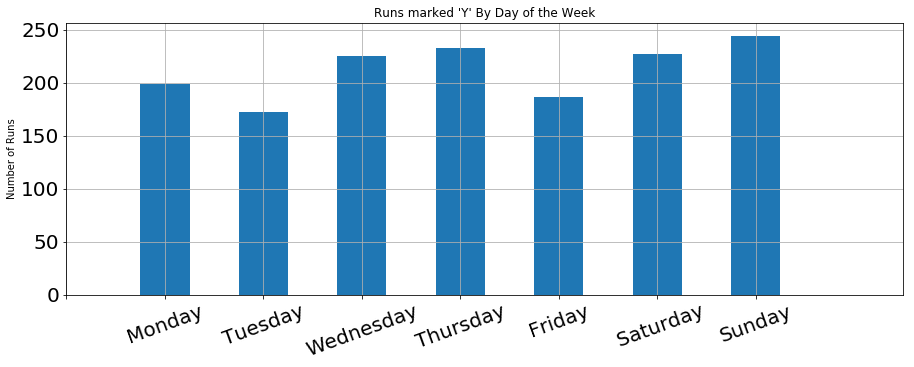

1486.0


In [10]:
fig,ax = plt.subplots(figsize=(15,5))
ding = plt.hist(pandas.to_datetime(df['startTime']).dt.dayofweek,bins=14, range=[0,7])
plt.xlim(-0.25,7.75)
plt.xticks([i-0.75 for i in range(8)])
ax.set_xticklabels(["", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday"," Saturday", "Sunday"], rotation=20)

plt.ylabel("Number of Runs")
plt.title("Runs marked 'Y' By Day of the Week")
plt.grid()

plt.show()
print(ding[0].sum())

In [11]:
uniqueDays = 0
previousday = -1
for i, day in df.iterrows():
    dayi = pandas.to_datetime(day['startTime']).dayofweek
    if(dayi == previousday):
        continue
    else:
        previousday = dayi
        uniqueDays += 1
print(uniqueDays, "days")

98 days


In [12]:
df['numberOfSubruns'].sum() * 10. / 60. / 60. / 24.

57.01134259259259

In [13]:
nrun3 = df['numberOfSubruns'].sum()
print(nrun3)

492578.0


In [14]:
nrun1 = 23560 + 39236 + 75512 + 27556
print(nrun1)

165864


In [15]:
nrun3/nrun1

2.9697704143153425

---

# Now lets make the datasets

---

In [16]:
nsubruns_9day = 53670
nsubruns_60h = 27292
nsubruns_endgame = 115352

nsubruns_min = nsubruns_endgame*2

print("Optimum subruns:", nsubruns_min)

Optimum subruns: 230704


In [17]:
print("Number of evenly spaced datasets:", df['numberOfSubruns'].sum() / nsubruns_min)

Number of evenly spaced datasets: 2.135108190581871


In [18]:
#datasetNames = ['A',"B", 'C', 'D', "E", "F", "G", "H"]
datasetNames = ["R3_D"+str(i).zfill(1) for i in range(10000)]

In [19]:
#This function will return the datetime in items which is the closest to the date pivot.
def nearest(items, pivot):
    #print(type(items), type(pivot))
    return min(items, key=lambda x: abs(x - pivot))

In [20]:
trolleyEquivRuns = [] #these are runs just before a trolley run
trolleyTimes = []

previousRow = False
for i, row in df_full.iterrows():
    firstTrolley = True
    if(row['isInTrolley'] and (not previousRow)):
        #print(row['run'])
        trolleyEquivRuns.append(row['run'])
        trolleyTimes.append(row['startTime'])
    previousRow = row['isInTrolley']

#print(trolleyEquivRuns)

In [21]:
print(trolleyEquivRuns)
print(len(trolleyEquivRuns), len(trolleyTimes))

[30214, 30301, 30387, 30491, 30912, 31335, 31425, 31521, 31626, 31694, 31805, 31885, 32154, 32191, 32368, 32466, 32544, 32673, 32782, 33032, 33085, 33206, 33283, 33361, 33443, 33522, 33540, 33666, 33745, 33838, 33911, 33997, 34143, 34236, 34363, 34447, 34470, 34620, 34665, 34765, 34867]
41 41


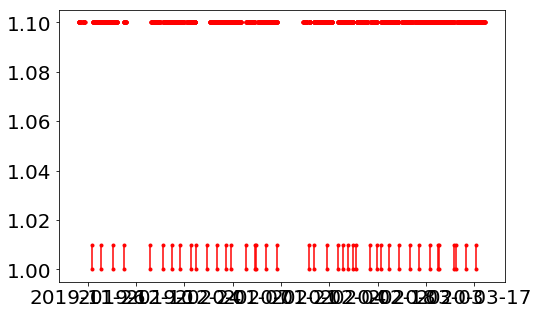

In [22]:
noint()
fig,ax = plt.subplots(figsize=(8,5))
for i, entry in df_full.iterrows():
    if(entry['run'] in trolleyEquivRuns):
        plt.plot([pandas.to_datetime(entry['startTime']), pandas.to_datetime(entry['startTime'])], [1,1.01], "r.-" )
plt.plot([pandas.to_datetime(df['startTime']), pandas.to_datetime(df['startTime'])], [1.1,1.1], "r." )
#plt.plot([pandas.to_datetime(df2['startTime']), pandas.to_datetime(df2['startTime'])], [1,1], "b." )

plt.show()

In [23]:
breakRuns = [] #these runs will mark the end of a dataset, manually chosen, no matter other metrics

In [24]:
breakRuns += [
    #30410, #removal of Ion Chamber IC025
    30921, #laser disk studies and new calo calibrations needed
    #31422, #kicker timing change
    32053, #DR collimators inserted
    #33790, #kicker cable change
    34141, #end of run3-a   
    34923, #end of run 3b
]

In [25]:
#Magnet Cycles
magnetCycles = [
    30247,
    30946,
    31367,
    32404,
    32581,
    33118,
    33320,
    33580,
    33702,
    33841,
    34701,
]

In [26]:
breakRuns += magnetCycles

In [27]:
totalSubrunsInDataset = 0
datasets = []
startRun = -1
previousRun = -1
previousStartTime = datetime.strptime("2019-11-23 12:35:12", "%Y-%m-%d %H:%M:%S")

for i, entry in df.iterrows():
    runi = entry['run']
    try:
        nsubruns = int(entry['numberOfSubruns'])
    except:
        nsubruns = 0
    runStartTime = entry['startTime']
    
    if(runi == df['run'].min() ):
        startRun = runi
        
    breakHere = False
    possibleBreak = False
    for x in breakRuns:
        if(previousRun < x and runi >= x):
            breakHere = True
            
    for tr in trolleyEquivRuns:
        if(runi >= tr and previousRun <= tr):
            possibleBreak = True
            
    maxTimeDifference = timedelta(days=7)
    #print(runStartTime)
    deltaT = datetime.strptime(runStartTime, "%Y-%m-%d %H:%M:%S") - previousStartTime
    if(deltaT >= maxTimeDifference):
        breakHere = True
    #print(deltaT, type(deltaT))
    
            
    if(   #(totalSubrunsInDataset >= nsubruns_min and ( (runi in trolleyEquivRuns) or (possibleBreak) ) or (runi == df['run'].max() )) or 
       (runi in breakRuns) or breakHere
       #or (totalSubrunsInDataset >= nsubruns_min)
      ):
        #print(runi)
        #append to optimum vector
        #print(len(datasets))
        namei = datasetNames[len(datasets)]
        print(namei)
        datasets.append( [namei, (startRun, previousRun), totalSubrunsInDataset] )
        totalSubrunsInDataset = 0
        startRun = nearest(df.loc[df['run'] >= runi]['run'], runi)     
        
    previousRun = runi
    previousStartTime = datetime.strptime(runStartTime, "%Y-%m-%d %H:%M:%S")
    totalSubrunsInDataset += nsubruns

#namei = datasetNames[len(datasets)]
#datasets.append( [namei, (startRun, runi), totalSubrunsInDataset] )
#totalSubrunsInDataset = 0
#startRun = runi + 1


R3_D0
R3_D1
R3_D2
R3_D3
R3_D4
R3_D5
R3_D6
R3_D7
R3_D8
R3_D9
R3_D10
R3_D11
R3_D12
R3_D13
R3_D14


In [28]:
#print(datasets)
for x in datasets:
    print("Name: ", x[0],"; Range: ", x[1])
dnames, drange, dsubs = zip(*datasets)

Name:  R3_D0 ; Range:  (30051, 30099)
Name:  R3_D1 ; Range:  (30252, 30506)
Name:  R3_D2 ; Range:  (30949, 31063)
Name:  R3_D3 ; Range:  (31368, 32035)
Name:  R3_D4 ; Range:  (32126, 32319)
Name:  R3_D5 ; Range:  (32404, 32465)
Name:  R3_D6 ; Range:  (32608, 32776)
Name:  R3_D7 ; Range:  (32985, 33082)
Name:  R3_D8 ; Range:  (33119, 33275)
Name:  R3_D9 ; Range:  (33320, 33521)
Name:  R3_D10 ; Range:  (33580, 33663)
Name:  R3_D11 ; Range:  (33704, 33743)
Name:  R3_D12 ; Range:  (33841, 34139)
Name:  R3_D13 ; Range:  (34184, 34619)
Name:  R3_D14 ; Range:  (34702, 34922)


No handles with labels found to put in legend.


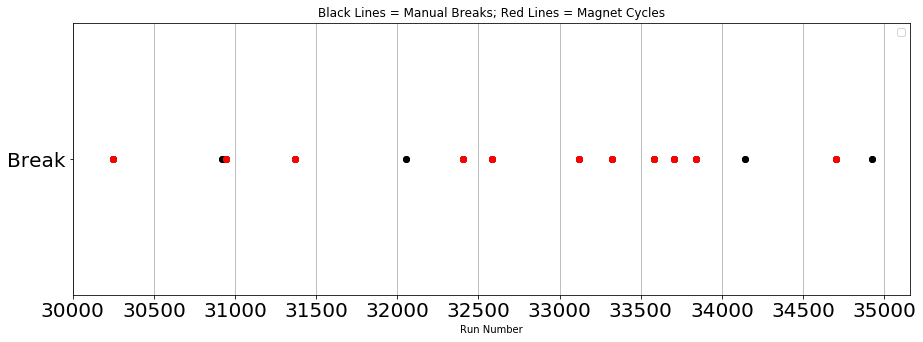

In [29]:
fig,ax = plt.subplots(figsize=(15,5))
#for x,y,z in datasets:
#    plt.plot(y, [1,1], label=x, linewidth=7)
for i in breakRuns:
    plt.plot([i,i], ["Break", "Break"], "o",color="black")
for i in magnetCycles:
    plt.plot([i,i], ["Break", "Break"], "o",color="red")
plt.title("Black Lines = Manual Breaks; Red Lines = Magnet Cycles")
#plt.xlim(34000,34200)
ax.xaxis.grid(True)
plt.xticks([x for x in range(30000,35100,500)])
plt.xlabel("Run Number")
plt.legend(ncol=2)
plt.show()

In [30]:
biggerdatasets = [['R3_D0', (30051, 30506), 51624], ['R3_D1', (30949, 32035), 93818], 
                  ['R3_D2', (32126, 32776), 82840], ['R3_D3', (32985, 34139), 141720], 
                  ['R3_D4', (34184, 34922), 122178]]

In [31]:
print(biggerdatasets)

[['R3_D0', (30051, 30506), 51624], ['R3_D1', (30949, 32035), 93818], ['R3_D2', (32126, 32776), 82840], ['R3_D3', (32985, 34139), 141720], ['R3_D4', (34184, 34922), 122178]]


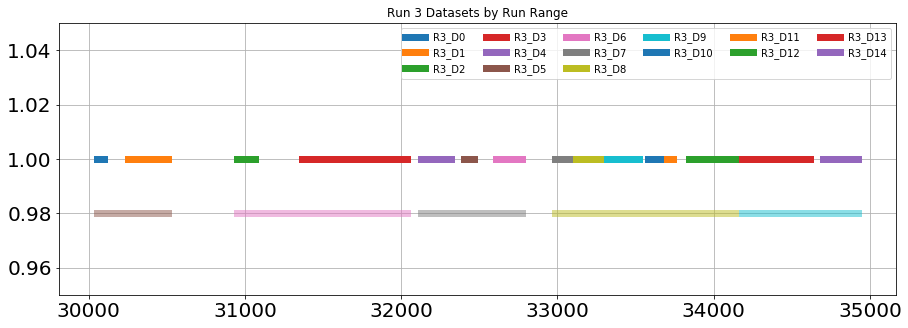

In [32]:
fig,ax = plt.subplots(figsize=(15,5))
for x,y,z in datasets:
    plt.plot(y, [1,1], label=x, linewidth=7)
for x,y,z in biggerdatasets:
    plt.plot(y, [0.98,0.98], label=None, linewidth=7, alpha=0.5)#, color="xkcd:light pink")#, alpha = 0.2)
if(False):
    for i in breakRuns:
        plt.plot([i,i], [0.99,1.01],color="black")
    for i in magnetCycles:
        plt.plot([i,i], [0.99,1.01],color="red")
    plt.title("Black Lines = Manual Breaks; Red Lines = Magnet Cycles")
else:
    plt.title("Run 3 Datasets by Run Range")
#plt.xlim(34000,34200)
plt.grid()
plt.ylim(0.95,1.05)
plt.legend(ncol=6)
plt.show()

[0.14993404660706433, 1.74160926278763, 0.5570130441154917, 2.8805510772387515, 1.1222336215740876, 0.6023743221456838, 1.3107137622746592, 0.28532170599443063, 1.2448336508867068, 0.8956104352923934, 0.7061776344716401, 0.45819287703356293, 1.6025941667888026, 2.6188993111534518, 1.857797156675949]


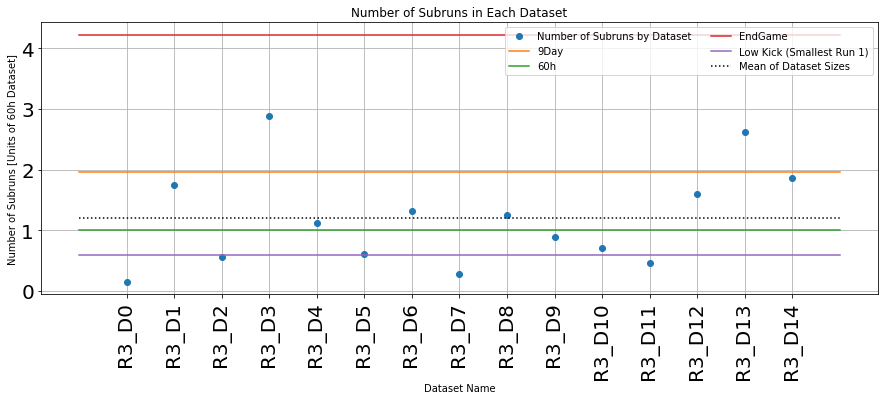

In [86]:
fig,ax = plt.subplots(figsize=(15,5))

#scalefactor = 1.
scalefactor = nsubruns_60h*1.0
#scalefactor = nsubruns_9day*1.0

plt.plot([x for x, xi in enumerate(dnames)], [x/scalefactor for x in dsubs], "o", label='Number of Subruns by Dataset')
print([x/scalefactor for x in dsubs])
plt.xticks([i for i in range(len(dnames))], dnames, rotation=90)

#plt.plot([-1,len(dnames)],[nsubruns_min/scalefactor, nsubruns_min/scalefactor], label="Goal")
plt.plot([-1,len(dnames)],[nsubruns_9day/scalefactor, nsubruns_9day/scalefactor], label="9Day")
plt.plot([-1,len(dnames)],[nsubruns_60h/scalefactor, nsubruns_60h/scalefactor], label="60h")
plt.plot([-1,len(dnames)],[nsubruns_endgame/scalefactor, nsubruns_endgame/scalefactor], label="EndGame")
plt.plot([-1,len(dnames)],[16330/scalefactor, 16330/scalefactor], label="Low Kick (Smallest Run 1)")
plt.plot([-1,len(dnames)],[np.mean(dsubs)/scalefactor, np.mean(dsubs)/scalefactor],":", color="black", label="Mean of Dataset Sizes")
plt.legend(loc=1, ncol=2)

plt.grid()

plt.title("Number of Subruns in Each Dataset")
plt.xlabel("Dataset Name")
plt.ylabel("Number of Subruns [Units of 60h Dataset]")


#plt.yscale("log")
#plt.savefig("/home/jlab/Desktop/dataset_sizes.png", dpi=600)
plt.show()

In [34]:
def plotDatasetsOverData(ax, drange, df, y):
    for i, (runstart, runend) in enumerate(drange):
        try:
            timestart = pandas.to_datetime( df.loc[df['run'] == runstart]['startTime'] ).values[0]
            timeend = pandas.to_datetime( df.loc[df['run'] == runend]['stopTime'] ).values[0]
            #print("hi")
            #ax.plot([10,12], [y,y])
            ax.plot([timestart, timeend], [y,y], linewidth=7)
        except:
            print("Unable to plot", runstart, runend)  
    return 0

def plotDatasetTimesOverData(ax, drange, y):
    for i, (timestart, timeend) in enumerate(drange):
        try:
            ax.plot([timestart, timeend], [y,y], linewidth=7)
        except:
            print("Unable to plot", runstart, runend)  
    return 0

def getTimesOfDatasets(drange, df):
    times = []
    for i, (runstart, runend) in enumerate(drange):
        try:
            timestart = pandas.to_datetime( df.loc[df['run'] == runstart]['startTime'] ).values[0]
            timeend = pandas.to_datetime( df.loc[df['run'] == runend]['stopTime'] ).values[0]
            #print("hi")
            #ax.plot([10,12], [y,y])
            times.append([timestart, timeend])
        except:
            print("Unable to plot", runstart, runend)  
    return times

In [35]:
drange_times = getTimesOfDatasets(drange, df)
#print(drange_times)

In [36]:
df_full.columns

Index(['run', 'startTime', 'stopTime', 'nEvents', 'quality', 'ctag',
       'ctagPerFill', 'nSubRuns', 'AvgGain_Calo1', 'AvgGain_Calo2',
       'AvgGain_Calo3', 'AvgGain_Calo4', 'AvgGain_Calo5', 'AvgGain_Calo6',
       'AvgGain_Calo7', 'AvgGain_Calo8', 'AvgGain_Calo9', 'AvgGain_Calo10',
       'AvgGain_Calo11', 'AvgGain_Calo12', 'AvgGain_Calo13', 'AvgGain_Calo14',
       'AvgGain_Calo15', 'AvgGain_Calo16', 'AvgGain_Calo17', 'AvgGain_Calo18',
       'AvgGain_Calo19', 'AvgGain_Calo20', 'AvgGain_Calo21', 'AvgGain_Calo22',
       'AvgGain_Calo23', 'AvgGain_Calo24', 'AvgTemp_AllCalos', 'AvgTemp_Calo1',
       'AvgTemp_Calo2', 'AvgTemp_Calo3', 'AvgTemp_Calo4', 'AvgTemp_Calo5',
       'AvgTemp_Calo6', 'AvgTemp_Calo7', 'AvgTemp_Calo8', 'AvgTemp_Calo9',
       'AvgTemp_Calo10', 'AvgTemp_Calo11', 'AvgTemp_Calo12', 'AvgTemp_Calo13',
       'AvgTemp_Calo14', 'AvgTemp_Calo15', 'AvgTemp_Calo16', 'AvgTemp_Calo17',
       'AvgTemp_Calo18', 'AvgTemp_Calo19', 'AvgTemp_Calo20', 'AvgTemp_Calo21',
       '

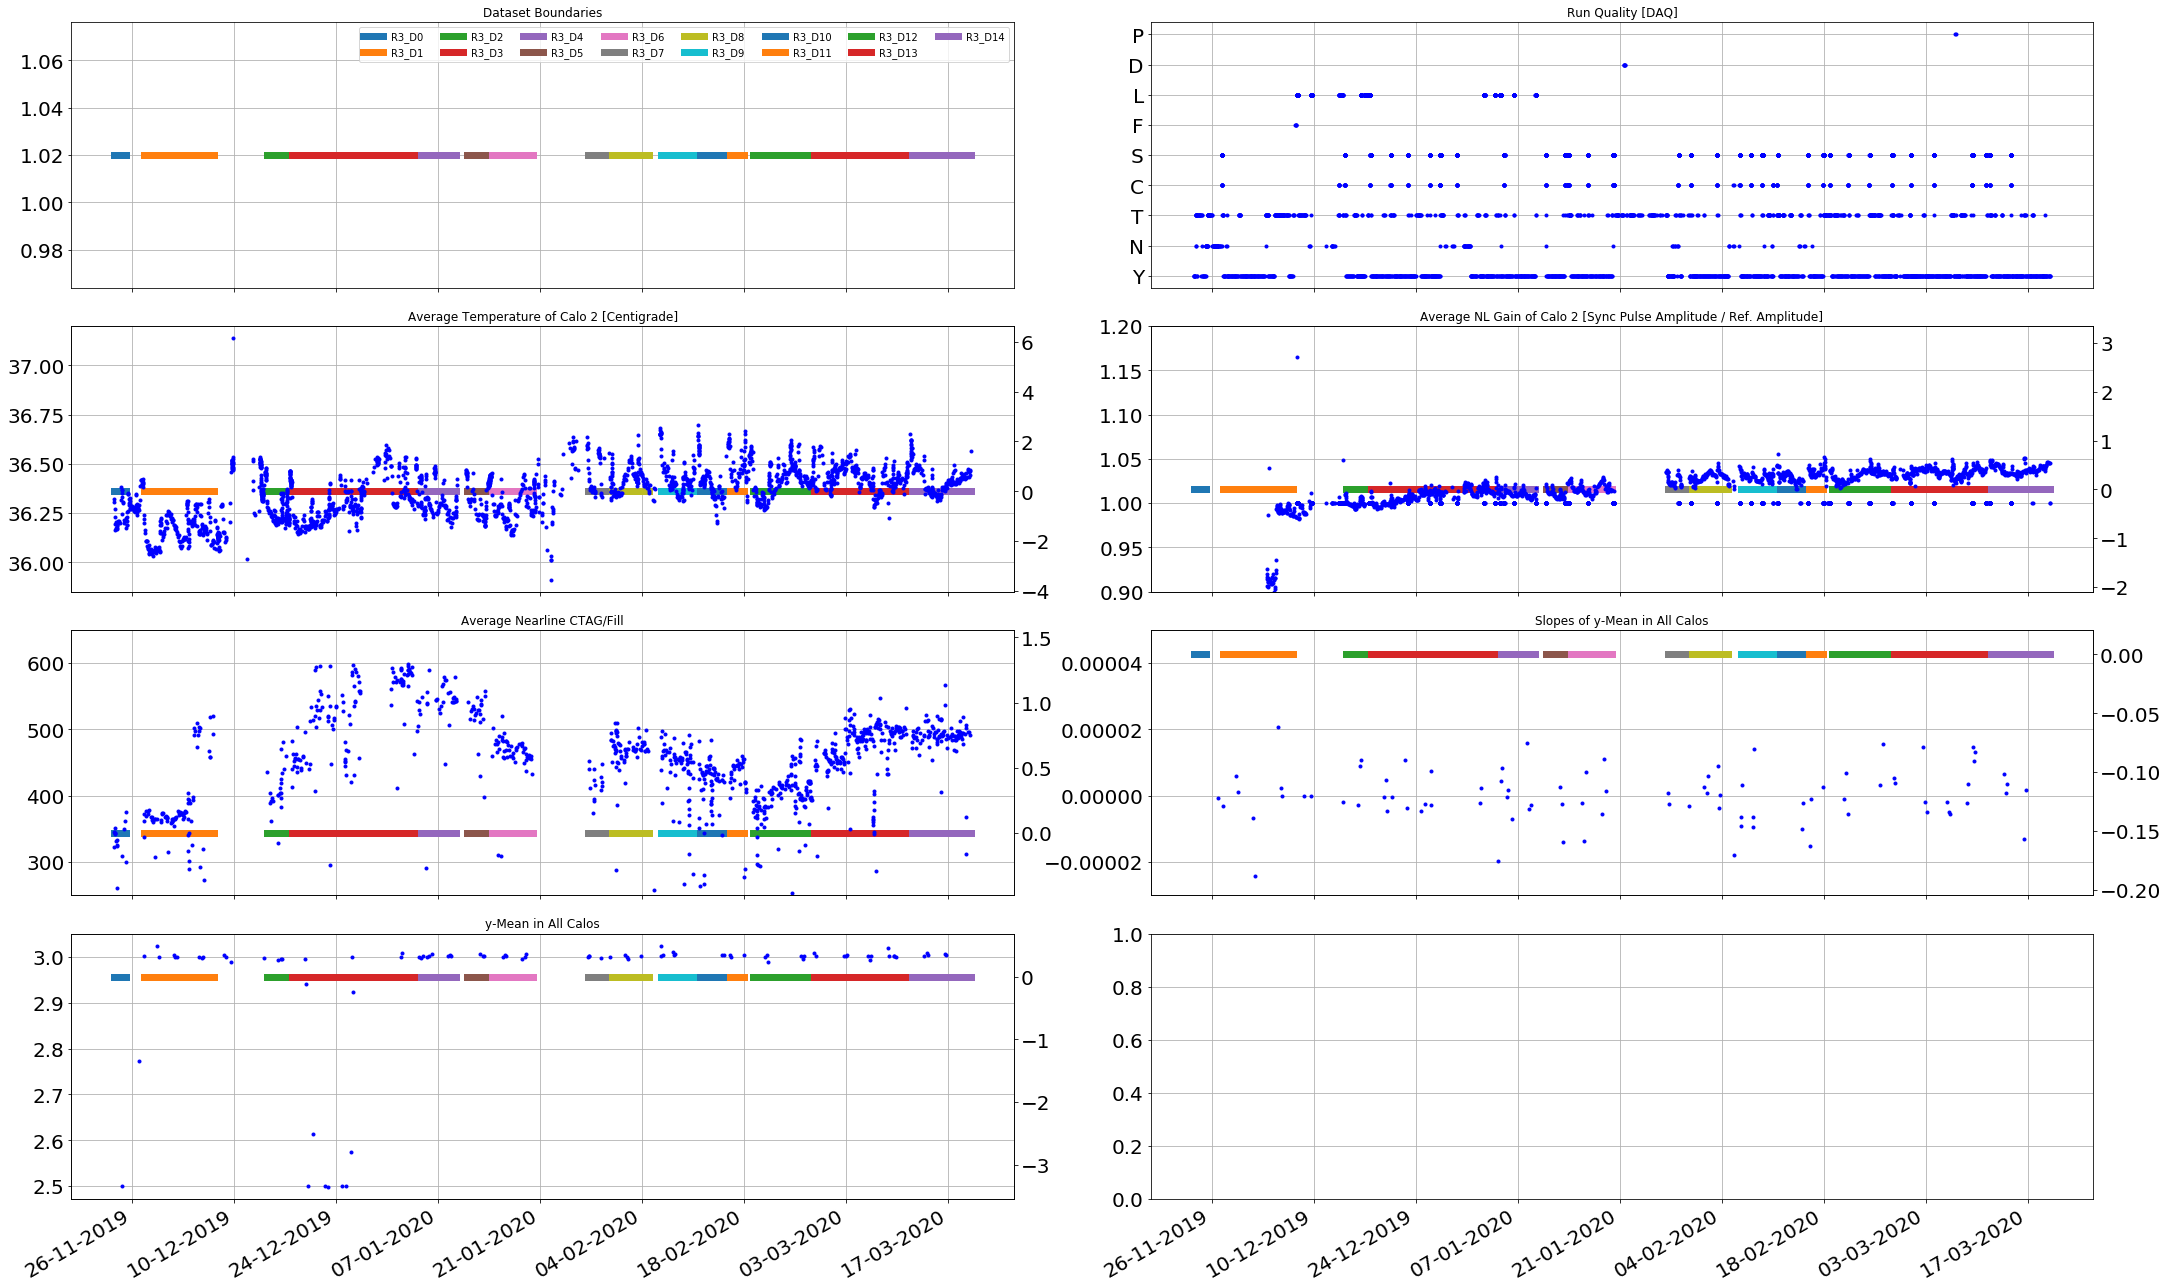

In [37]:
noint()

plotVsTime = True

if(plotVsTime):
    plotX = 'startTime'
else:
    plotX = 'run'

runplots = [ #[todraw, title, ylim, duration?, numeric?]
    ['quality', 'Run Quality [DAQ]', [], False, False ],
#    ['runType', 'Run Quality [Mark]', [], False, False],
    ['AvgTemp_Calo2', 'Average Temperature of Calo 2 [Centigrade]', [], False, True],
    ['AvgGain_Calo2', 'Average NL Gain of Calo 2 [Sync Pulse Amplitude / Ref. Amplitude]', [0.9,1.2], False, True],
#    ['magnetCycled', 'First Production Run Since Magnet Cycle', [0.9,1.2], False, True],
    ['ctagPerFill', 'Average Nearline CTAG/Fill', [250,650], False, True],
#    ['isInTrolley', 'Trolley Runs', [0.99,1.01], False, False],
#    ['type_mark', 'Type In Marks Spreadsheet', [], False, False],
    ['y_slopes', 'Slopes of y-Mean in All Calos', [-0.00003,0.00005], False, True],
    ['y_means', 'y-Mean in All Calos', [], False, True],
#    ['magnet cycle', 'magnet cycle', [], False, False],
#    ['relatice dipole [ppb]', 'Relative Dipole [ppb]', [], False, True],
#    ['norm quad [ppb]', 'Normal Quadrupole [ppb]', [], False, True],
#    ['skew quad [ppb]', 'Skew Quadrupole [ppb]', [], False, True],
#    ['norm sext [ppb]', 'Normal Sextapole [ppb]', [], False, True],
#    ['skew sext [ppb]', 'Skew Sextapole [ppb]', [], False, True],
#    ['feedback current [mA]', 'Feedback Current [mA]', [], False, True],
#    ['yoke temp top [C]', 'Top Yoke Temperature [Avg.]', [], False, True],
#    ['yoke temp bottom [C]', 'Bottom Yoke Temperature [Avg.]', [], False, True],
#    ['yoke_temp_gradient', 'Temperature Gradient Top - Bottom [C]', [], False, True]
    
]


nplots = len(runplots)
width=2
fig,axs = plt.subplots(int((nplots)/width)+1,width,figsize=(15*width,nplots*3),sharex=True, sharey=False)
if(width > 1):
    ax = flatten2dArray(axs)
else:
    ax = axs
for axi in ax:
    plt.sca(axi)
    plt.xticks(rotation=90)
    axi.grid()
    if(plotVsTime):
        axi.xaxis.set_major_formatter(DateFormatter('%d-%m-%Y'))

if(plotVsTime):
    fig.autofmt_xdate() 

for i, (runstart, runend) in enumerate(drange):
    try:
        timestart = pandas.to_datetime( df.loc[df['run'] == runstart]['startTime'] ).values[0]
        timeend = pandas.to_datetime( df.loc[df['run'] == runend]['stopTime'] ).values[0]
        if(plotVsTime):
            ax[0].plot([timestart, timeend], [1.02,1.02],label=dnames[i], linewidth=7.0)
        else:
            ax[0].plot([runstart, runend], [1.02,1.02],label=dnames[i], linewidth=7.0)
        ax[0].set_title("Dataset Boundaries")
    except:
        print("Unable to plot", runstart, runend)  
        
ax[0].legend(ncol=8)

df_to_use = df_full

for i, ding in enumerate(runplots):
    axi = ax[i+1]
    if(ding[4] and plotVsTime):
        plotDatasetsOverData(axi, drange, df_to_use, df_to_use[ding[0]].mean())
    makeTrendPlot(axi, ding, df_to_use)


#plt.xlim(pandas.to_datetime("13-12-2019"), pandas.to_datetime("01-02-2020"))
plt.tight_layout()
#plt.savefig("/home/jlab/Desktop/dataset_ranges.png", dpi=600)
#plt.savefig("/home/jlab/Desktop/dataset_ranges.eps", dpi=600)

plt.show()

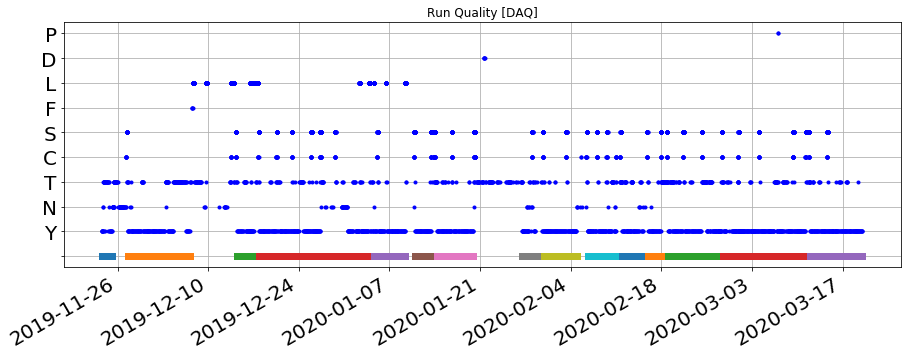

In [65]:
fig,ax = plt.subplots(figsize=(15,5))
for i, (runstart, runend) in enumerate(drange):
    try:
        timestart = pandas.to_datetime( df.loc[df['run'] == runstart]['startTime'] ).values[0]
        timeend = pandas.to_datetime( df.loc[df['run'] == runend]['stopTime'] ).values[0]
        ax.plot([timestart, timeend], [" ", " "],label=dnames[i], linewidth=7.0)
        ax.set_title("Dataset Boundaries Overlayed on 2-Week Rolling Production Schedule")
    except:
        print("Unable to plot", runstart, runend) 

fig.autofmt_xdate() 

makeTrendPlot(ax, ['quality', 'Run Quality [DAQ]', [], False, False ], df_full)

        
plt.grid()        
plt.show()


2019-11-22 12:35:12 <DateOffset: days=14>
[Timestamp('2019-11-22 12:35:12'), Timestamp('2019-12-06 12:35:12'), Timestamp('2019-12-20 12:35:12'), Timestamp('2020-01-03 12:35:12'), Timestamp('2020-01-17 12:35:12'), Timestamp('2020-01-31 12:35:12'), Timestamp('2020-02-14 12:35:12'), Timestamp('2020-02-28 12:35:12'), Timestamp('2020-03-13 12:35:12'), Timestamp('2020-03-27 12:35:12')]
0 2019-11-22 12:35:12 2019-11-22 12:35:12
1 2019-12-06 12:35:12 2019-12-06 12:35:12
2 2019-12-20 12:35:12 2019-12-20 12:35:12
3 2020-01-03 12:35:12 2020-01-03 12:35:12
4 2020-01-17 12:35:12 2020-01-17 12:35:12
5 2020-01-31 12:35:12 2020-01-31 12:35:12
6 2020-02-14 12:35:12 2020-02-14 12:35:12
7 2020-02-28 12:35:12 2020-02-28 12:35:12
8 2020-03-13 12:35:12 2020-03-13 12:35:12
9 2020-03-27 12:35:12 2020-03-27 12:35:12


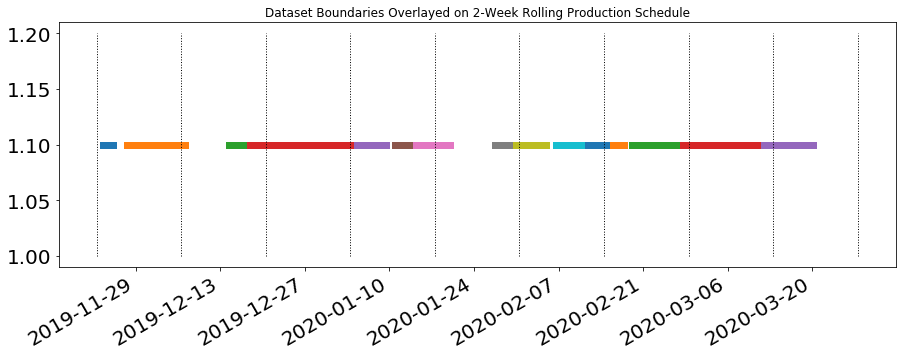

In [39]:
fig,ax = plt.subplots(figsize=(15,5))
for i, (runstart, runend) in enumerate(drange):
    try:
        timestart = pandas.to_datetime( df.loc[df['run'] == runstart]['startTime'] ).values[0]
        timeend = pandas.to_datetime( df.loc[df['run'] == runend]['stopTime'] ).values[0]
        ax.plot([timestart, timeend], [1.1,1.1],label=dnames[i], linewidth=7.0)
        ax.set_title("Dataset Boundaries Overlayed on 2-Week Rolling Production Schedule")
    except:
        print("Unable to plot", runstart, runend) 
        
fig.autofmt_xdate() 

timestart = pandas.to_datetime( df.loc[df['run'] == drange[0][0]]['startTime'] ).values[0]
timeend = pandas.to_datetime( df.loc[df['run'] == drange[len(drange)-1][1]]['stopTime'] ).values[0]

timestart = pandas.to_datetime(timestart - pandas.Timedelta(days=1))

ndays = 14

print(timestart, pandas.DateOffset(days=ndays))
date_list = [pandas.to_datetime(timestart + pandas.Timedelta(days=ndays*x)) for x in range(10)]
print(date_list)
for i, date in enumerate(date_list):
    print(i,pandas.to_datetime(timestart + pandas.Timedelta(days=ndays*i)) , pandas.to_datetime(date) )
    plt.plot( [pandas.to_datetime(date), pandas.to_datetime(date)], [1,1.2], ":", linewidth=1, color="black")
plt.show()


---

# Now lets create the larger datasets


---

In [55]:
allNames = []

In [56]:
for i, (name, runs, subruns) in enumerate(biggerdatasets):
    #print(name, runs)
    name = "run3_largeDatasets_midas_R3_BD"+str(i)
    allNames.append(name)
    print(createSamDataset(name,runs,"","raw","range"))

samweb -e gm2 create-definition run3_largeDatasets_midas_R3_BD0 " ( (run_number >= 30051 and run_number <= 30506)) and data_tier raw " 
samweb -e gm2 create-definition run3_largeDatasets_midas_R3_BD1 " ( (run_number >= 30949 and run_number <= 32035)) and data_tier raw " 
samweb -e gm2 create-definition run3_largeDatasets_midas_R3_BD2 " ( (run_number >= 32126 and run_number <= 32776)) and data_tier raw " 
samweb -e gm2 create-definition run3_largeDatasets_midas_R3_BD3 " ( (run_number >= 32985 and run_number <= 34139)) and data_tier raw " 
samweb -e gm2 create-definition run3_largeDatasets_midas_R3_BD4 " ( (run_number >= 34184 and run_number <= 34922)) and data_tier raw " 


In [57]:
for i, (name, runs, subruns) in enumerate(datasets):
    #print(name, runs)
    name = "run3_smallDatasets_midas_R3_D"+str(i)
    allNames.append(name)
    print(createSamDataset(name,runs,"","raw","range"))

samweb -e gm2 create-definition run3_smallDatasets_midas_R3_D0 " ( (run_number >= 30051 and run_number <= 30099)) and data_tier raw " 
samweb -e gm2 create-definition run3_smallDatasets_midas_R3_D1 " ( (run_number >= 30252 and run_number <= 30506)) and data_tier raw " 
samweb -e gm2 create-definition run3_smallDatasets_midas_R3_D2 " ( (run_number >= 30949 and run_number <= 31063)) and data_tier raw " 
samweb -e gm2 create-definition run3_smallDatasets_midas_R3_D3 " ( (run_number >= 31368 and run_number <= 32035)) and data_tier raw " 
samweb -e gm2 create-definition run3_smallDatasets_midas_R3_D4 " ( (run_number >= 32126 and run_number <= 32319)) and data_tier raw " 
samweb -e gm2 create-definition run3_smallDatasets_midas_R3_D5 " ( (run_number >= 32404 and run_number <= 32465)) and data_tier raw " 
samweb -e gm2 create-definition run3_smallDatasets_midas_R3_D6 " ( (run_number >= 32608 and run_number <= 32776)) and data_tier raw " 
samweb -e gm2 create-definition run3_smallDatasets_mida

In [59]:
for i in allNames:
    print("samweb -e gm2 count-definition-files ", i)

samweb -e gm2 count-definition-files  run3_largeDatasets_midas_R3_BD0
samweb -e gm2 count-definition-files  run3_largeDatasets_midas_R3_BD1
samweb -e gm2 count-definition-files  run3_largeDatasets_midas_R3_BD2
samweb -e gm2 count-definition-files  run3_largeDatasets_midas_R3_BD3
samweb -e gm2 count-definition-files  run3_largeDatasets_midas_R3_BD4
samweb -e gm2 count-definition-files  run3_smallDatasets_midas_R3_D0
samweb -e gm2 count-definition-files  run3_smallDatasets_midas_R3_D1
samweb -e gm2 count-definition-files  run3_smallDatasets_midas_R3_D2
samweb -e gm2 count-definition-files  run3_smallDatasets_midas_R3_D3
samweb -e gm2 count-definition-files  run3_smallDatasets_midas_R3_D4
samweb -e gm2 count-definition-files  run3_smallDatasets_midas_R3_D5
samweb -e gm2 count-definition-files  run3_smallDatasets_midas_R3_D6
samweb -e gm2 count-definition-files  run3_smallDatasets_midas_R3_D7
samweb -e gm2 count-definition-files  run3_smallDatasets_midas_R3_D8
samweb -e gm2 count-definitio

In [60]:
allNumberOfSubruns = [83271,
                    120860,
                    92403,
                    177495,
                    138837,
                    9642,
                    62254,
                    17838,
                    100960,
                    32681,
                    16911,
                    38881,
                    11870,
                    36159,
                    29114,
                    22781,
                    12818,
                    52979,
                    80693,
                    56635]

In [64]:
for i,j in zip(allNames, allNumberOfSubruns):
    print(i," \t->",j,'subruns')

run3_largeDatasets_midas_R3_BD0  	-> 83271 subruns
run3_largeDatasets_midas_R3_BD1  	-> 120860 subruns
run3_largeDatasets_midas_R3_BD2  	-> 92403 subruns
run3_largeDatasets_midas_R3_BD3  	-> 177495 subruns
run3_largeDatasets_midas_R3_BD4  	-> 138837 subruns
run3_smallDatasets_midas_R3_D0  	-> 9642 subruns
run3_smallDatasets_midas_R3_D1  	-> 62254 subruns
run3_smallDatasets_midas_R3_D2  	-> 17838 subruns
run3_smallDatasets_midas_R3_D3  	-> 100960 subruns
run3_smallDatasets_midas_R3_D4  	-> 32681 subruns
run3_smallDatasets_midas_R3_D5  	-> 16911 subruns
run3_smallDatasets_midas_R3_D6  	-> 38881 subruns
run3_smallDatasets_midas_R3_D7  	-> 11870 subruns
run3_smallDatasets_midas_R3_D8  	-> 36159 subruns
run3_smallDatasets_midas_R3_D9  	-> 29114 subruns
run3_smallDatasets_midas_R3_D10  	-> 22781 subruns
run3_smallDatasets_midas_R3_D11  	-> 12818 subruns
run3_smallDatasets_midas_R3_D12  	-> 52979 subruns
run3_smallDatasets_midas_R3_D13  	-> 80693 subruns
run3_smallDatasets_midas_R3_D14  	-> 5

---

### Now lets create a dataset of 'other' subruns

---

In [83]:
runStart = 30000
runEnd = 35000

dataset = 'samweb -e gm2 create-definition run3_allOtherSubruns_R3_DX_2 " ( (run_number >= '+str(runStart)
dataset +=' and run_number <= '+str(runEnd)+')) and not ( '
for name in allNames:
    if("BD" not in name):
        dataset += "( defname: "+name+" ) or "
dataset = dataset[:-3]+" )"
dataset += " and data_tier raw \" "


print(dataset)

samweb -e gm2 create-definition run3_allOtherSubruns_R3_DX_2 " ( (run_number >= 30000 and run_number <= 35000)) and not ( ( defname: run3_smallDatasets_midas_R3_D0 ) or ( defname: run3_smallDatasets_midas_R3_D1 ) or ( defname: run3_smallDatasets_midas_R3_D2 ) or ( defname: run3_smallDatasets_midas_R3_D3 ) or ( defname: run3_smallDatasets_midas_R3_D4 ) or ( defname: run3_smallDatasets_midas_R3_D5 ) or ( defname: run3_smallDatasets_midas_R3_D6 ) or ( defname: run3_smallDatasets_midas_R3_D7 ) or ( defname: run3_smallDatasets_midas_R3_D8 ) or ( defname: run3_smallDatasets_midas_R3_D9 ) or ( defname: run3_smallDatasets_midas_R3_D10 ) or ( defname: run3_smallDatasets_midas_R3_D11 ) or ( defname: run3_smallDatasets_midas_R3_D12 ) or ( defname: run3_smallDatasets_midas_R3_D13 ) or ( defname: run3_smallDatasets_midas_R3_D14 )  ) and data_tier raw " 
